## 천재교육_2기_이윤섭

### <필수 분석 3번>
* 결제방법에 따른 결제금액 분석
    - 결제방법에 따른 결제금액에 유의미한 차이가 있는지 분석 후 시각화해보자
    - 결제방법이 여러 조합일 경우, 맨 앞의 한가지만 사용한 것으로 간주한다 #할부기간이 NAN인 경우 일시불

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic'
pd.options.display.float_format = '{:.5f}'.format

In [2]:
df=pd.read_excel('./미니프로젝트-쇼핑몰 실습데이터.xlsx')
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


* 결제방법에 따른 결제금액에 유의미한 차이가 있는지 분석 후 시각화해보자
* 결제방법이 여러 조합일 경우, 맨 앞의 한가지만 사용한 것으로 간주한다 #할부기간이 NAN인 경우 일시불

In [3]:
df['결제방법'].unique()

array(['신용카드', '가상계좌', '후불', '무통장입금', nan, '신 + 포', '포인트', '신 + 적',
       '신 + 적 + 포', '적 + 포', '웰컴마일', '신 + 웰컴', '적립금', '후 + 포',
       '후 + 적 + 포', '후 + 적', '정 + 적', '정 + 적 + 포', '정기결제', '정 + 포',
       '현금간편결제', '현 + 포', '현 + 적', '현 + 적 + 포', '-', ' + 포'], dtype=object)

In [88]:
df['주문수량'].describe()

count   218601.00000
mean         3.15414
std         19.51157
min          0.00000
25%          1.00000
50%          1.00000
75%          2.00000
max       2000.00000
Name: 주문수량, dtype: float64

In [5]:
df['주문수량'].value_counts()

1       140590
2        30930
3        13030
4         7418
5         6911
         ...  
1100         1
400          1
95           1
410          1
93           1
Name: 주문수량, Length: 111, dtype: int64

In [6]:
change = {'가상계좌':'현금', '후불':'현금', '무통장입금':'현금', '신 + 포':'신용카드',
          '포인트':'현금', '신 + 적':'신용카드', '신 + 적 + 포':'신용카드', '적 + 포':'현금', '웰컴마일':'현금', '신 + 웰컴':'신용카드',
          '적립금':'현금', '후 + 포':'현금', '현금간편결제':'현금', '현 + 포':'현금', '현 + 적':'현금', '현 + 적 + 포':'현금',' + 포':'현금','-':'신용카드','후 + 적 + 포':'현금','후 + 적':'현금','정 + 적':'신용카드','정 + 적 + 포':'신용카드','정기결제':'신용카드','정 + 포':'신용카드'}

In [7]:
df.replace({'결제방법':change}, inplace=True) # inplace=true 할시 그냥 값에 저장됨

In [8]:
change = {'가상계좌':'현금', '후불':'현금', '무통장입금':'현금', '신 + 포':'신용카드',
          '포인트':'현금', '신 + 적':'신용카드', '신 + 적 + 포':'신용카드', '적 + 포':'현금', '웰컴마일':'현금', '신 + 웰컴':'신용카드',
          '적립금':'현금', '후 + 포':'현금', '현금간편결제':'현금', '현 + 포':'현금', '현 + 적':'현금', '현 + 적 + 포':'현금',' + 포':'현금','-':'신용카드','후 + 적 + 포':'현금','후 + 적':'현금','정 + 적':'신용카드','정 + 적 + 포':'신용카드','정기결제':'신용카드','정 + 포':'신용카드'}

In [9]:
df['결제방법']=df['결제방법'].fillna('신용카드')

In [10]:
df['결제방법'].unique()

array(['신용카드', '현금'], dtype=object)

In [11]:
df['결제방법'].value_counts()

신용카드    169008
현금       49593
Name: 결제방법, dtype: int64

In [12]:
df

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,현금,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,현금,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신용카드,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,현금,2022-11-08 10:45:14,배송완료,N,NaN,NaN


In [14]:
m=df['결제방법']=='신용카드'

In [15]:
dfc=df[m]

In [16]:
dfm=df[-m]

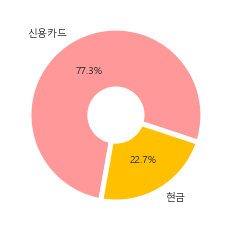

In [61]:
ratio = [len(dfc.index),len(dfm.index)]
labels = ['신용카드', '현금']
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.savefig('./fig7.jpg',dpi=700)
plt.show()

In [84]:
dfm['판매금액'].describe()

count     49593.00000
mean      33788.28000
std      186273.03390
min           0.00000
25%        3500.00000
50%        7300.00000
75%       21000.00000
max     9216000.00000
Name: 판매금액, dtype: float64

In [85]:
dfc['판매금액'].describe()

count     169008.00000
mean       58325.70331
std       230107.90378
min            0.00000
25%         3900.00000
50%        10000.00000
75%        29500.00000
max     19800000.00000
Name: 판매금액, dtype: float64

In [64]:
c=dfc.sample(500)
m=dfm.sample(500)

In [65]:
c=c.reset_index()
c=c.drop(['index'],axis='columns')

m=m.reset_index()
m=m.drop(['index'],axis='columns')

In [66]:
a=pd.concat([c,m],axis=0)

In [67]:
stats.shapiro(c['판매금액'])

ShapiroResult(statistic=0.30664628744125366, pvalue=1.5231385632009313e-39)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

C:\Users\lee\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


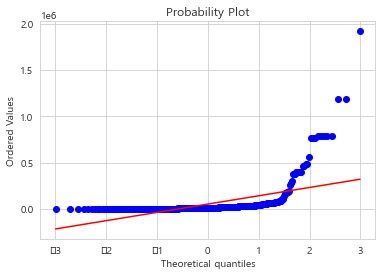

In [68]:
stats.probplot(c['판매금액'],plot=plt)

In [69]:
stats.shapiro(m['판매금액'])

ShapiroResult(statistic=0.21232390403747559, pvalue=2.5542868407712766e-41)

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

C:\Users\lee\anaconda3\envs\ml\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


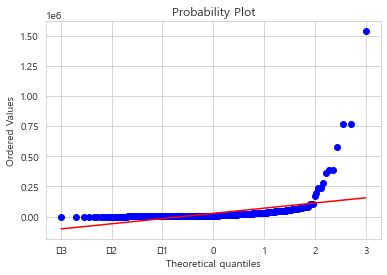

In [70]:
stats.probplot(m['판매금액'],plot=plt)

In [71]:
stats.mannwhitneyu(c['판매금액'],m['판매금액'])

MannwhitneyuResult(statistic=135146.5, pvalue=0.02627146928315145)

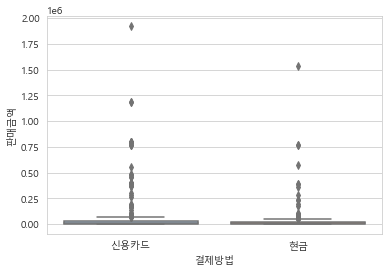

In [72]:
sns.boxplot(x="결제방법", y="판매금액",data=a)
plt.savefig('./fig8.jpg',dpi=700)

In [86]:
c['판매금액'].describe() # Credit Card 

count       500.00000
mean      51500.16800
std      162837.27554
min         100.00000
25%        3500.00000
50%       10000.00000
75%       29900.00000
max     1920000.00000
Name: 판매금액, dtype: float64

In [87]:
m['판매금액'].describe() # Money

count       500.00000
mean      26398.95000
std       94621.55382
min         100.00000
25%        3500.00000
50%        7400.00000
75%       22365.00000
max     1536000.00000
Name: 판매금액, dtype: float64

In [73]:
qc1=c['판매금액'].quantile(0.25)
qc2=c['판매금액'].quantile(0.5)
qc3=c['판매금액'].quantile(0.75)
iqrc=qc3-qc1

In [74]:
list1=[]
for i in range(len(c.iloc[:,0])):
    if c.loc[i,'판매금액']>qc3+(iqrc*1.5):  
        pass
    elif c.loc[i,'판매금액']<qc1-(iqrc*1.5):  
        pass
    else:
        list1.append(c.loc[i,:])
a=pd.DataFrame(list1)

In [75]:
a

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,220430210232767,다우기술,[죠스떡볶이] 2인세트,죠스떡볶이,1,9900,신용카드,2022-04-30 21:00:28,미결제,N,NaN,NaN
1,210614143501998,다우기술,[시원달달특가!] 배스킨라빈스 패밀리 아이스크림,배스킨라빈스,1,17840,신용카드,2021-06-14 14:33:52,구매확정,N,NaN,NaN
2,210130160627421,다우기술,[파리바게트] 초코반 딸기반 케이크,파리바게트,1,21600,신용카드,2021-01-30 16:05:48,구매확정,N,NaN,NaN
3,200110202016983,쥬크박스,[학생선물] 팡팡 점핑볼(핑퐁게임)-2개입,쥬크박스,4,2400,신용카드,2020-01-10 20:21:29,구매확정,N,NaN,NaN
4,220510000936303,다우기술,[스무디킹] 엔젤푸드L,스무디킹,10,6550,신용카드,2022-05-10 00:07:32,미결제,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,201229230707416,지니,[스마트 HBM*초도] 친환경 비닐 쇼핑백 (1세트 100개입),NaN,1,20000,신용카드,2020-12-29 23:06:35,구매확정,Y,NaN,NaN
496,220511084903365,다우기술,[신세계] 신세계 상품권-1만원권,신세계,1,9600,신용카드,2022-05-11 08:46:58,구매확정,N,NaN,NaN
497,220216192517790,조이스,[학습준비물] 톰보 전문가용 연필지우개(소) 30개,톰보,1,5550,신용카드,2022-02-16 19:23:16,구매확정,N,NaN,NaN
498,211218165902407,유앤알코리아,[학생선물] 3000 수학연습장 1479 (색상선택),미소로,2,3000,신용카드,2021-12-18 16:57:18,구매확정,N,NaN,NaN


In [76]:
qm1=m['판매금액'].quantile(0.25)
qm2=m['판매금액'].quantile(0.5)
qm3=m['판매금액'].quantile(0.75)
iqrm=qm3-qm1

In [77]:
list2=[]
for i in range(len(m.iloc[:,0])):
    if m.loc[i,'판매금액']>qm3+(iqrm*1.5):  
        pass
    elif m.loc[i,'판매금액']<qm1-(iqrm*1.5):  
        pass
    else:
        list2.append(m.loc[i,:])
b=pd.DataFrame(list2)

In [78]:
b

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,220206211930493,지니,[5월 해법특가] 스마트 HBE-Bank Book(칭찬통장) 1세트 50개입,HB,1,2900,현금,2022-02-06 21:17:33,미결제,N,NaN,NaN
1,221103184119896,지니,[한정판매] 스마트 HBM-흔들이 핫팩 1Box 80개입,동성산업,1,29900,현금,2022-11-03 18:38:59,배송준비,N,NaN,NaN
2,220204032232351,다우기술,"[해피머니] 온라인 상품권 5,000원",해피머니,1,5000,현금,2022-02-04 03:20:37,구매확정,N,NaN,NaN
3,220725110524386,거영아이앤디,[학급운영] 초코 지팡이-24개입,엠케이푸드,2,23040,현금,2022-07-25 11:03:15,구매확정,N,NaN,NaN
4,220111180747342,다우기술,[맥도날드] 빅맥 세트,맥도날드,1,5580,현금,2022-01-11 18:05:59,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,210310182047245,지니,[eHBM*초도] 셀파수학교실-학습계통도(중등 5종),HB,1,375,현금,2021-03-10 18:19:59,구매확정,Y,NaN,NaN
496,221021164157564,다우기술,"[해피콘] 금액권 15,000원",해피콘,1,13300,현금,2022-10-21 16:40:31,미결제,N,NaN,NaN
497,221004121933883,지니,[스마트 HBM*초도교재] e해법 원리쏙쏙 4-2-1권,HB,1,3500,현금,2022-10-04 12:17:17,구매확정,Y,NaN,NaN
498,211024211448415,라온웍스,[할로윈특가] 할로윈 코스튬! 오징어게임 가면-1set 9개입(각 3개씩)+무료배송,NaN,1,35900,현금,2021-10-24 21:13:10,구매확정,N,NaN,NaN


In [91]:
from scipy import stats
from scipy.stats import mannwhitneyu

In [98]:
stats.shapiro(dfc['판매금액'])

C:\Users\lee\anaconda3\envs\ml\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.2209433913230896, pvalue=0.0)

In [99]:
stats.shapiro(dfm['판매금액'])

ShapiroResult(statistic=0.12352216243743896, pvalue=0.0)

In [100]:
stats.mannwhitneyu(dfc['판매금액'],dfm['판매금액'])

MannwhitneyuResult(statistic=4646078157.0, pvalue=3.2028421481755495e-297)

In [79]:
qq=pd.concat([a,b],axis=0)

In [80]:
qq=qq.reset_index()
qq=qq.drop(['index'],axis='columns')
qq

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,220430210232767,다우기술,[죠스떡볶이] 2인세트,죠스떡볶이,1,9900,신용카드,2022-04-30 21:00:28,미결제,N,NaN,NaN
1,210614143501998,다우기술,[시원달달특가!] 배스킨라빈스 패밀리 아이스크림,배스킨라빈스,1,17840,신용카드,2021-06-14 14:33:52,구매확정,N,NaN,NaN
2,210130160627421,다우기술,[파리바게트] 초코반 딸기반 케이크,파리바게트,1,21600,신용카드,2021-01-30 16:05:48,구매확정,N,NaN,NaN
3,200110202016983,쥬크박스,[학생선물] 팡팡 점핑볼(핑퐁게임)-2개입,쥬크박스,4,2400,신용카드,2020-01-10 20:21:29,구매확정,N,NaN,NaN
4,220510000936303,다우기술,[스무디킹] 엔젤푸드L,스무디킹,10,6550,신용카드,2022-05-10 00:07:32,미결제,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
910,210310182047245,지니,[eHBM*초도] 셀파수학교실-학습계통도(중등 5종),HB,1,375,현금,2021-03-10 18:19:59,구매확정,Y,NaN,NaN
911,221021164157564,다우기술,"[해피콘] 금액권 15,000원",해피콘,1,13300,현금,2022-10-21 16:40:31,미결제,N,NaN,NaN
912,221004121933883,지니,[스마트 HBM*초도교재] e해법 원리쏙쏙 4-2-1권,HB,1,3500,현금,2022-10-04 12:17:17,구매확정,Y,NaN,NaN
913,211024211448415,라온웍스,[할로윈특가] 할로윈 코스튬! 오징어게임 가면-1set 9개입(각 3개씩)+무료배송,NaN,1,35900,현금,2021-10-24 21:13:10,구매확정,N,NaN,NaN


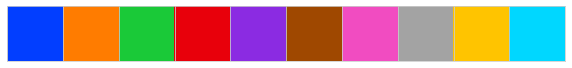

In [89]:
palette = sns.color_palette("bright")
sns.palplot(palette)
sns.set_palette("pastel")
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic'

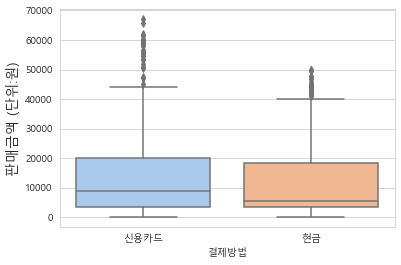

In [90]:
sns.boxplot(x="결제방법", y="판매금액",data=qq)
plt.savefig('./fig10.png',dpi=700)
plt.ylabel('판매금액 (단위:원)', fontsize=14)
plt.savefig('./fig9.jpg',dpi=700)

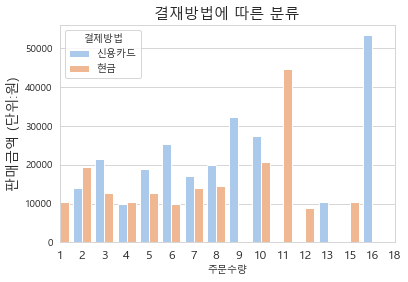

In [83]:
sns.barplot(x="주문수량", y="판매금액", hue="결제방법", data=qq,ci=None) 
plt.title('결재방법에 따른 분류', fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('판매금액 (단위:원)', fontsize=14)
plt.xlim([0, 15])
plt.savefig('./fig10.jpg',dpi=700)